# Library

In [1]:
# !pip install lightgbm


In [2]:
# !pip install xgboost


In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import random


import os
import time
import datetime
import calendar

from sklearn.metrics import mean_squared_error


import sklearn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import KFold, StratifiedKFold


from sklearn import clone
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# from utils_model import * # expand later

In [3]:
# np.set_seed(0)

# Data

In [4]:
data = pd.read_csv('train.csv')
data.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [5]:
data_test = pd.read_csv('test.csv')
data_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,...,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,...,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,...,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,...,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,...,3.34,2007,5,3,2,0,3,0,82.32,0.0


# Exploration

## Check NulL

In [5]:
data.shape

(11153, 22)

In [6]:
data[data.duplicated()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance


In [96]:
total_null = data.isnull().sum().sort_values(ascending=False).head(30) / data.shape[0]
total_null

Last_achievement_%                       0.00009
Achievement_above_100%_during3quartal    0.00009
Best Performance                         0.00000
number_of_dependences                    0.00000
job_duration_in_current_job_level        0.00000
person_level                             0.00000
job_duration_in_current_person_level     0.00000
job_duration_in_current_branch           0.00000
Employee_type                            0.00000
gender                                   0.00000
age                                      0.00000
marital_status_maried(Y/N)               0.00000
Education_level                          0.00000
GPA                                      0.00000
year_graduated                           0.00000
job_duration_from_training               0.00000
branch_rotation                          0.00000
job_rotation                             0.00000
assign_of_otherposition                  0.00000
annual_leave                             0.00000
sick_leaves         

In [97]:
data[data['Last_achievement_%'].isna()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual_leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


In [98]:
data['Last_achievement_%'].describe()

count    11152.000000
mean        72.234902
std         23.030421
min          4.510000
25%         56.650000
50%         71.675000
75%         88.172500
max        130.000000
Name: Last_achievement_%, dtype: float64

In [10]:
# data = data[~data['Last_achievement_%'].isna()]

## Check Var

In [11]:
check_idx_features = [0,22]

print(data.iloc[:,check_idx_features[0]:check_idx_features[1]].info())
print()
data.iloc[:,check_idx_features[0]:check_idx_features[1]].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0


In [12]:
data.iloc[:,check_idx_features[0]:check_idx_features[1]].select_dtypes(exclude=['object']).describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
count,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11152.000000,11152.000000,11153.000000
mean,1.433208,1.349218,1.034646,1.735587,1985.837084,0.995517,3.176195,2009.174124,6.277952,3.720165,3.505694,1.202726,3.664216,1.100152,72.234902,0.679071,0.146777
std,0.431086,0.324660,0.416723,0.441040,4.632214,0.881103,13.321687,4.117162,5.033553,2.399068,1.818028,2.575138,2.652648,2.714525,23.030421,1.107381,0.353899
min,0.000000,0.000000,0.000000,1.000000,1963.000000,0.000000,0.000000,1982.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.510000,0.000000,0.000000
25%,1.224745,1.224745,0.707107,1.000000,1985.000000,0.000000,2.820000,2008.000000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.650000,0.000000,0.000000
50%,1.352775,1.352775,1.118034,2.000000,1987.000000,1.000000,3.070000,2010.000000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.675000,0.000000,0.000000
75%,1.414214,1.385641,1.224745,2.000000,1989.000000,2.000000,3.270000,2012.000000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,88.172500,1.000000,0.000000
max,2.958040,2.828427,2.677686,2.000000,1997.000000,7.000000,378.000000,2019.000000,36.000000,22.000000,15.000000,29.000000,21.000000,77.000000,130.000000,3.000000,1.000000


In [13]:
data[data['job_duration_in_current_person_level']==0].shape

(119, 22)

In [14]:
data.iloc[:,check_idx_features[0]:check_idx_features[1]].select_dtypes(include=['object']).describe()

,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level
count,11153,11153,11153,11153,11153
unique,3,8,3,2,6
top,JG04,PG03,RM_type_A,Y,level_4
freq,10413,9655,7287,9501,9222


In [99]:
categ_data = data.select_dtypes(include=['object'])
categ_data.describe().iloc[1,:].sort_values(ascending=False)

person_level                  8
Education_level               6
Employee_type                 3
job_level                     3
marital_status_maried(Y/N)    2
Name: unique, dtype: object

25 is not that much cardinality number imo

In [100]:
print(categ_data.shape)

(11153, 5)


In [101]:
for col in categ_data.columns:
    print(pd.crosstab(categ_data[col],data['Best Performance']))
    
    print('===========\n')

Best Performance     0     1
job_level                   
JG03                28     8
JG04              8890  1523
JG05               598   106

Best Performance     0     1
person_level                
PG01                14     5
PG02                13     3
PG03              8233  1422
PG04               656   101
PG05               276    32
PG06               307    71
PG07                17     2
PG08                 0     1

Best Performance     0     1
Employee_type               
RM_type_A         6257  1030
RM_type_B         2842   538
RM_type_C          417    69

Best Performance               0     1
marital_status_maried(Y/N)            
N                           1392   260
Y                           8124  1377

Best Performance     0     1
Education_level             
level_0              1     0
level_1            113    27
level_2              4     0
level_3           1481   262
level_4           7880  1342
level_5             37     6



Categorical variable kinda mix between targets

In [18]:
# sns.distplot(num_data[num_data['Best Performance']==0].iloc[:,0],label='0')
# sns.distplot(num_data[num_data['Best Performance']==1].iloc[:,1],label='1')

In [19]:
# import plotly.figure_factory as ff
# fig = ff.create_distplot([num_data[num_data['Best Performance']==0].iloc[:,0],
#                          num_data[num_data['Best Performance']==1].iloc[:,0]], ['0','1'])
# fig.show()


(11153, 17)


E:\Anaconda3\envs\andre\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

E:\Anaconda3\envs\andre\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



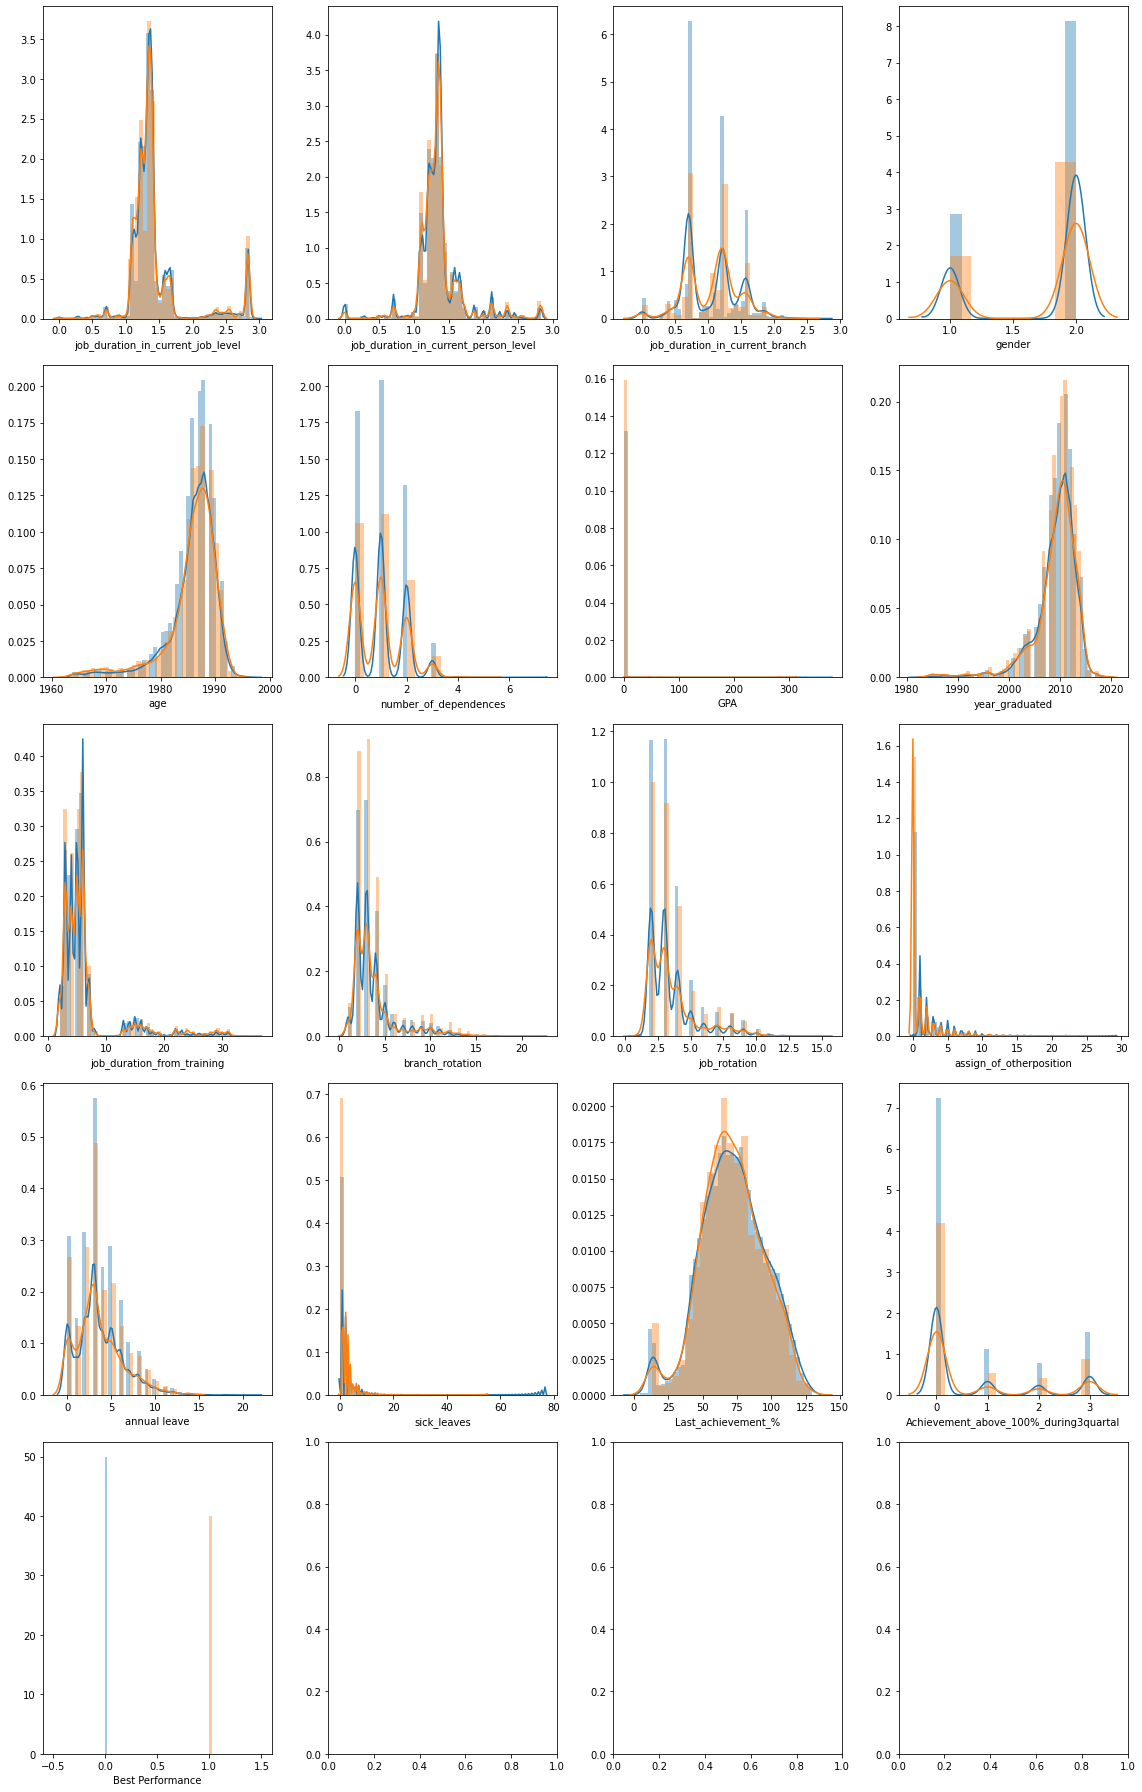

In [40]:
num_data = data.select_dtypes(exclude=['object'])
print(num_data.shape)
fig, axs = plt.subplots(5,4 ,figsize=(16,25))
col_idx = 0
for i in range(5):
    for j in range(4):
#         axs[i,j].scatter(x=num_data[num_data.columns[col_idx]],y=num_data['Best Performance'],color =random.choice(['red','blue','green','yellow']) )
        sns.distplot(num_data[num_data['Best Performance']==0].iloc[:,col_idx],label='0',ax=axs[i,j])
        sns.distplot(num_data[num_data['Best Performance']==1].iloc[:,col_idx],label='1',ax=axs[i,j])
        col_idx+=1
        if col_idx==17:
            break
plt.tight_layout()
plt.show()

In [181]:
# print(num_data[num_data['GPA']>4].shape)
# num_data[num_data['GPA']>4].sort_values('GPA',ascending=False)

GPA kinda weird > 4 52 rows


## Check Colinearity

In [1]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data.corr(),
#             annot=True
#            )
# plt.show()

In [21]:
matrix_corr = data.corr()

In [22]:
high_correlation_features = []
threshold = 0.8


for i,col in enumerate(matrix_corr.iloc[:-1,:-1].columns):  # exclude target
    if col=='Best Performance':
        continue
    for j in range(len(matrix_corr.iloc[:-1,:-1].columns)): # exclude target
        if j==i or j>i-1:
            continue
        else:
            if np.abs(matrix_corr.iloc[i,j])>=threshold:
                print(matrix_corr.columns[i] + ' ' +matrix_corr.columns[j] + ' Highly Correlated')
                print(matrix_corr.iloc[i,j])
                print('=========\n')
                high_correlation_features.append([matrix_corr.columns[i],matrix_corr.columns[j]])

year_graduated age Highly Correlated
0.8339015866998329

job_duration_from_training age Highly Correlated
-0.8851091167947067

branch_rotation job_duration_from_training Highly Correlated
0.8480636832446575



Perhaps Age should be dropped, job_duration_from_training 

In [23]:
high_correlation_features

[['year_graduated', 'age'],
 ['job_duration_from_training', 'age'],
 ['branch_rotation', 'job_duration_from_training']]

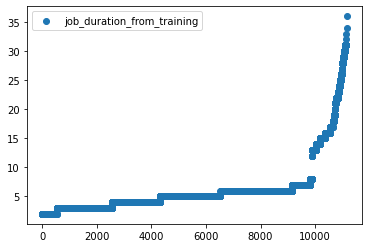

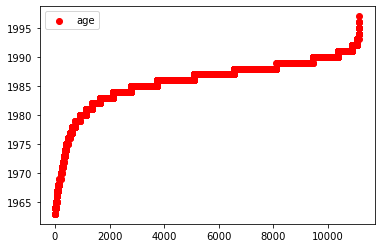

In [24]:
idx = 1
plt.scatter(x=[a for a in range(len(data))],y=data[high_correlation_features[idx][0]].sort_values(),label=high_correlation_features[idx][0])
plt.legend()
plt.show()
plt.scatter(x=[a for a in range(len(data))],y=data[high_correlation_features[idx][1]].sort_values(),label=high_correlation_features[idx][1],color='red')
plt.legend()
plt.show()


In [62]:
import scipy.stats as ss


# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]   # return chi2, pvalue, degrees of freedom, expected value
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# matrix_corr_categ = categ_data.iloc[:,:2].corr(method = cramers_v)
# matrix_corr_categ
matrix_corr_categ = pd.DataFrame(index = categ_data.columns)
for col in categ_data.columns:
    corr = []
    for col2 in categ_data.columns:
        corr.append(cramers_v(data[col].fillna('nan'),data[col2].fillna('nan')))
    matrix_corr_categ[col] = corr
matrix_corr_categ


,job_level,person_level,Employee_type,marital_status_maried(Y/N),Education_level
job_level,1.000000,0.992022,0.121256,0.087713,0.129538
person_level,0.992022,1.000000,0.164040,0.122962,0.108174
Employee_type,0.121256,0.164040,1.000000,0.125009,0.008476
marital_status_maried(Y/N),0.087713,0.122962,0.125009,0.999645,0.000000
Education_level,0.129538,0.108174,0.008476,0.000000,1.000000


In [63]:
high_correlation_features = []
threshold = 0.8


for i,col in enumerate(matrix_corr_categ.iloc[:-1,:-1].columns):  # exclude target
    if col=='Best Performance':
        continue
    for j in range(len(matrix_corr_categ.iloc[:-1,:-1].columns)): # exclude target
        if j==i or j>i-1:
            continue
        else:
            if matrix_corr_categ.iloc[i,j]>=threshold:
                print(matrix_corr_categ.columns[i] + ' ' +matrix_corr_categ.columns[j] + ' Highly Correlated')
                print(matrix_corr_categ.iloc[i,j])
                print('=========\n')
                high_correlation_features.append([matrix_corr_categ.columns[i],matrix_corr_categ.columns[j]])

person_level job_level Highly Correlated
0.9920215200793246



In [64]:
for cols in high_correlation_features:
    print(pd.crosstab(categ_data[cols[0]],data['Best Performance']))
    print()
    print(pd.crosstab(categ_data[cols[1]],data['Best Performance']))
    print('===========\n')

Best Performance     0     1
person_level                
PG01                14     5
PG02                13     3
PG03              8233  1422
PG04               656   101
PG05               276    32
PG06               307    71
PG07                17     2
PG08                 0     1

Best Performance     0     1
job_level                   
JG03                28     8
JG04              8890  1523
JG05               598   106



person level / job level should be dropped

## Target

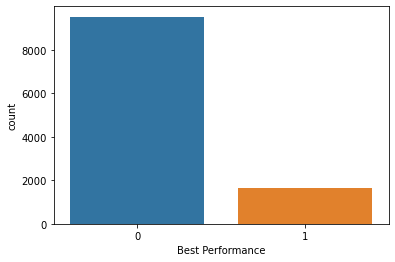

In [67]:
sns.countplot(data['Best Performance'])

In [195]:
num_cols

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'age',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual_leave',
 'sick_leaves',
 'Last_achievement',
 'Achievement_above_100%_during3quartal']

# Preprocess

In [2]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

data['gender'] = data['gender'].astype('str')
data_test['gender'] = data_test['gender'].astype('str')

data['Achievement_above_100%_during3quartal'] = data['Achievement_above_100%_during3quartal'].astype(str)
data_test['Achievement_above_100%_during3quartal'] = data_test['Achievement_above_100%_during3quartal'].astype(str)


data = data.rename(columns={'annual leave':'annual_leave'})
data_test = data_test.rename(columns={'annual leave':'annual_leave'})

data = data.rename(columns={'Last_achievement_%':'Last_achievement'})
data_test = data_test.rename(columns={'Last_achievement_%':'Last_achievement'})


In [3]:
# get test data (for final evaluation)
X_train = data.drop(columns=['Best Performance'])
y_train = data['Best Performance']
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [4]:
# len(X_train),len(X_val)

In [5]:
num_cols = list(X_train.select_dtypes(exclude=['object']))
cat_cols = list(X_train.select_dtypes(include=['object']))
features = list(X_train.columns)
len(num_cols),len(cat_cols),len(features)

(14, 7, 21)

# baseline

In [6]:
def fast_build_model(num_cols,cat_cols,features,X,y,cv,model=LogisticRegression(class_weight='balanced')):

    num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

    cat_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                    ])

    transformer = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ])


    main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', model)])
    
    skf = StratifiedKFold(n_splits=cv,random_state = 0)

    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    aucs = []
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        X_train = X.iloc[train_index,:]
        y_train = y.iloc[train_index]
        X_val = X.iloc[val_index,:]
        y_val = y.iloc[val_index]
        model = clone(main_pipeline)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)[:,1]
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)
        aucs.append(roc_auc_score(y_val.values, pred_proba,average='micro'))
        pipelines.append(model)
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='micro')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    print(aucs)
    print(np.mean(aucs[:2]))
    return pipelines


def fast_predict(X,pipelines):
#     pred = np.zeros(1,len(X))
    pred_proba = np.zeros((len(X)))
    for i in range(len(pipelines)):
        pred_proba += pipelines[i].predict_proba(X)[:,1] / len(pipelines)
    
    return pred_proba
        

In [7]:
num_cols = list(X_train.select_dtypes(exclude=['object']))
cat_cols = list(X_train.select_dtypes(include=['object']))
features = list(X_train.columns)

In [12]:
len(features), len(num_cols), len(cat_cols)

(21, 14, 7)

## logreg

In [372]:
cv = 5
pipelines_logreg = fast_build_model(num_cols,cat_cols,features,X_train,y_train,cv,model=LogisticRegression(class_weight='balanced'))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

Fit iteration 0 done in : 0.22999858856201172
Fit iteration 1 done in : 0.18000006675720215


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Fit iteration 2 done in : 0.19000005722045898
Fit iteration 3 done in : 0.18700098991394043

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Fit iteration 4 done in : 0.19211554527282715
PRec Rec AUC average : [0.8627418  0.15764209] [0.53898697 0.50152718] <==> 0.5300845593814539


In [30]:
# pred_proba = fast_predict(X_val,pipelines)

# pred = np.where(pred_proba>=0.5,1,0)
# prec,rec,f1, _ = precision_recall_fscore_support(y_val,pred)
# auc = roc_auc_score(y_val.values, pred_proba,average='micro')
# print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')

## XGBClassifier

In [201]:
cv = 5
pipelines_XGB_achiv_str = fast_build_model(num_cols,cat_cols,features,X_train,y_train,cv,model=XGBClassifier(scale_pos_weight =3))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:13:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 0.6649985313415527
[22:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 1 done in : 0.6270022392272949
[22:13:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 2 done in : 0.6579983234405518
[22:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 3 done in : 0.6910004615783691
[22:14:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 4 done in : 0.6839995384216309
PRec Rec AUC average : [0.85699122 0.19620253] [0.93327028 0.0946854 ] <==> 0.5442767773300435
[0.5273446534577133, 0.5618054932519898, 0.5579156146264563, 0.5226947311584316, 0.5529206258908756]
0.5445750733548516


In [102]:
cv = 5
pipelines_XGB = fast_build_model(num_cols,cat_cols,features,X_train,y_train,cv,model=XGBClassifier(scale_pos_weight =3))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:35:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 0.603999137878418
[21:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 1 done in : 0.6359996795654297
[21:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 2 done in : 0.6010003089904785
[21:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 3 done in : 0.5990009307861328
[21:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 4 done in : 0.5830004215240479
PRec Rec AUC average : [0.85660559 0.19157088] [0.93348045 0.09163103] <==> 0.5380613829057603
[0.5182377997070388, 0.5437899721876882, 0.5384742319572433, 0.5352260473965942, 0.5582702991092449]
0.5310138859473634


In [73]:
(0.5182377997070388+0.5437899721876882)/2

0.5310138859473634

In [32]:
# pred_proba = fast_predict(X_val,pipelines_XGB)

# pred = np.where(pred_proba>=0.5,1,0)
# prec,rec,f1, _ = precision_recall_fscore_support(y_val,pred)
# auc = roc_auc_score(y_val.values, pred_proba,average='micro')
# print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')

In [34]:
X_train2 = X_train.copy()
# X_val2 = X_val.copy()
X_train2['GPA'] = np.where(X_train2['GPA']>4,4,X_train2['GPA'])
# X_val2['GPA'] = np.where(X_val2['GPA']>4,4,X_val2['GPA'])

X_train2 = X_train2.drop(columns=['age','person_level','job_duration_from_training'])
# X_val2 = X_val2.drop(columns=['age','person_level','job_duration_from_training'])

num_cols2 = list(X_train2.select_dtypes(exclude='object').columns)
cat_cols2 = list(X_train2.select_dtypes(include='object').columns)
features2 = num_cols2.copy()
features2.extend(cat_cols2)

In [35]:
cv = 5
pipelines_XGB2 = fast_build_model(num_cols2,cat_cols2,features2,X_train2,y_train,cv,model=XGBClassifier(scale_pos_weight =3))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 0.44896912574768066
[21:38:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 1 done in : 0.467998743057251
[21:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 2 done in : 0.49900007247924805
[21:38:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 3 done in : 0.46700000762939453
[21:38:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Fit iteration 4 done in : 0.5069994926452637
PRec Rec AUC average : [0.85693501 0.19217082] [0.92843632 0.09896151] <==> 0.5384088669874844


In [36]:
len(features2), len(num_cols2), len(cat_cols2)

(18, 13, 5)

In [40]:
# pred_proba = fast_predict(X_val2,pipelines_XGB2)

# pred = np.where(pred_proba>=0.5,1,0)
# prec,rec,f1, _ = precision_recall_fscore_support(y_val,pred)
# auc = roc_auc_score(y_val.values, pred_proba,average='micro')
# print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')

In [41]:
X_test = data_test.copy()
X_test['GPA'] = np.where(X_test['GPA']>4,4,X_test['GPA'])
X_test = X_test.drop(columns=['age','person_level','job_duration_from_training'])

In [212]:
pred_proba = fast_predict(X_test,pipelines_XGB2)


In [213]:
df_submission = pd.DataFrame({'index':X_test.index,'Best Performance':pred_proba})
df_submission

,index,Best Performance
0,0,0.199513
1,1,0.342040
2,2,0.463371
3,3,0.091576
4,4,0.165634
...,...,...
5995,5995,0.239684
5996,5996,0.104323
5997,5997,0.048302
5998,5998,0.186930


In [214]:
df_submission.to_csv('df_submission_9feb_XGBclassifier_2.csv',index=False)

# FE

In [8]:
class Feature_Engineering:
    def __init__(self,parameters):
        self.parameters = parameters
        self.target = parameters['target']
    
    @staticmethod  
    def check_col(col):
        if len(col.split(' '))>1:
            col2 = '_'.join(col.split(' '))
        else:
            col2 = col
        return col2
    
    @staticmethod
    def get_bin(data,col,n_bin,mode='cut'):
        while True:
            try:
                if mode=='cut':
                    _,bin_dummy = pd.cut(data[col],n_bin,retbins=True)
                else:
                    _,bin_dummy = pd.qcut(data[col],n_bin,retbins=True)
            except:
                n_bin -= 1
                continue
            break
        return bin_dummy
        
    def fit(self,data_ori):
        target = self.target
        data = data_ori.copy()
        for param in self.parameters['bin_numer_qcut']:
            col = param[0]
            n_bin = param[1]
            bin_dummy = self.get_bin(data,col,n_bin,mode='qcut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_numer_qcut',bin_dummy)
        for param in self.parameters['bin_numer_cut']:
            col = param[0]
            n_bin = param[1]
            bin_dummy = self.get_bin(data,col,n_bin,mode='cut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_numer_cut',bin_dummy)
            
            
        for param in self.parameters['bin_add_categ_numer_bin_qcut']:
            col = param[1]
            n_bin = param[2]
            bin_dummy = self.get_bin(data,col,n_bin,mode='qcut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_qcut_add_categ',bin_dummy)
        
        for param in self.parameters['bin_target_encoding_cut']:
            col = param[0]
            n_bin = param[1]
            bin_dummy = self.get_bin(data,col,n_bin,mode='cut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_cut',bin_dummy)
            
            data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
            data_dummy = data.groupby([f'{col}_bin_target_encoding_cut'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_bin_target_encoding_cut',data_dummy)
            
        for param in self.parameters['bin_target_encoding_qcut']:
            col = param[0]
            n_bin = param[1]
            bin_dummy = self.get_bin(data,col,n_bin,mode='qcut')
            bin_dummy[0] = bin_dummy[0]-0.001
            bin_dummy[-1] = np.inf
            setattr(self,f'{col}_bin_qcut',bin_dummy)
            
            data[f'{col}_bin_target_encoding_qcut'] = pd.cut(data[col],bins=bin_dummy)
            data_dummy = data.groupby([f'{col}_bin_target_encoding_qcut'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_bin_target_encoding_qcut',data_dummy)
           
        for param in self.parameters['bin_target_encoding_custom_bin']:
            col = param[0]
            bins = param[1]
            setattr(self,f'{col}_bin_custom_bin',bins)
            
            data[f'{col}_bin_target_encoding_custom_bin'] = pd.cut(data[col],bins=bins)
            data_dummy = data.groupby([f'{col}_bin_target_encoding_custom_bin'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_bin_target_encoding_custom_bin',data_dummy)
        
        for param in self.parameters['categorical_mean_encoding']:
            col = param
            data[f'{col}_categorical_mean_encoding'] = data[col].copy().values
            data_dummy = data.groupby([f'{col}_categorical_mean_encoding'])[target].mean().reset_index(drop=False)
            setattr(self,f'{col}_categorical_mean_encoding',data_dummy)
        
        
        
        self.fit = True
        return data
        
    
    def transform(self,X,mode='train'):
        data = X.copy()
        target = self.target
        if mode!='train':
            target_encode = self.target
        else:
            target_encode = self.target +"_y"
            
        if self.fit==False:
            raise Exception("Fit to train data first")
        
        for param in self.parameters['bin_numer_qcut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_numer_qcut')
            data[f'{col}_bin_numer_qcut'] = pd.cut(data[col],bins=bin_dummy).astype(str).values
        for param in self.parameters['bin_numer_cut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_numer_cut')
            data[f'{col}_bin_numer_cut'] = pd.cut(data[col],bins=bin_dummy).astype(str).values
            
        for cols in self.parameters['bin_add_categ_numer_bin_qcut']:
            col_add = cols[0] + '_' + cols[1]
            bin_dummy = eval(f'self.{cols[1]}_bin_qcut_add_categ')
            data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
            data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = (data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)).values
        
        for param in self.parameters['bin_target_encoding_cut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_cut')
            data_dummy = eval(f'self.{col}_bin_target_encoding_cut')
            data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy).values
            data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
        
        for param in self.parameters['bin_target_encoding_qcut']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_qcut')
            data_dummy = eval(f'self.{col}_bin_target_encoding_qcut')
            data[f'{col}_bin_target_encoding_qcut'] = pd.cut(data[col],bins=bin_dummy).values
            data[f'{col}_bin_target_encoding_qcut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_qcut'])[f'{target_encode}'].values
        
        for param in self.parameters['bin_target_encoding_custom_bin']:
            col = param[0]
            bin_dummy = eval(f'self.{col}_bin_custom_bin')
            data_dummy = eval(f'self.{col}_bin_target_encoding_custom_bin')
            data[f'{col}_bin_target_encoding_custom_bin'] = pd.cut(data[col],bins=bin_dummy).values
            data[f'{col}_bin_target_encoding_custom_bin'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_custom_bin'])[f'{target_encode}'].values
        
        for param in self.parameters['categorical_mean_encoding']:
            col = param
            data_dummy = eval(f'self.{col}_categorical_mean_encoding')
            data[f'{col}_categorical_mean_encoding'] = data[col].copy().values
            data[f'{col}_categorical_mean_encoding'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_categorical_mean_encoding'])[f'{target_encode}'].values
        
        
        for cols in self.parameters['multiply']:
            data[cols[0] + 'x' +cols[1]] = (data[cols[0]] * data[cols[1]]).values
        for cols in self.parameters['add']:
            data[cols[0] + '+' +cols[1]] = (data[cols[0]] + data[cols[1]]).values
        for cols in self.parameters['add_str']:
            data[cols[0] + '+' +cols[1]] = (data[cols[0]].astype(str)+'_' + data[cols[1]].astype(str)).values
            
        for cols in self.parameters['substract']:
            data[cols[0] + '-' +cols[1]] = (data[cols[0]] - data[cols[1]]).values
        for cols in self.parameters['divide']:
            data[cols[0] + '/' +cols[1]] = (data[cols[0]] / np.where(data[cols[1]]==0,0.0001,data[cols[1]])).values
        
        
        
        
        return data
    
    

In [14]:
num_cols

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'age',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual_leave',
 'sick_leaves',
 'Last_achievement']

In [15]:
cat_cols

['job_level',
 'person_level',
 'Employee_type',
 'gender',
 'marital_status_maried(Y/N)',
 'Education_level',
 'Achievement_above_100%_during3quartal']

In [16]:


parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[['GPA',10]],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'
             
            
            }
data2 = data.loc[X_train.index].copy()
data2 = data2.rename(columns={'annual leave':'annual_leave'})

add_fe = Feature_Engineering(parameters)
add_fe.fit(data2)
data2_fe = add_fe.transform(data2)




GPA
GPA
year_graduated
GPA
annual_leave


In [23]:
data2_fe.iloc[:,-15:]

,Best Performance,GPA_bin_numer_qcut,job_level_GPA_bin_add_categ_numer_bin_qcut,Education_level_GPA_bin_add_categ_numer_bin_qcut,year_graduated_bin_target_encoding_qcut,GPA_bin_target_encoding_qcut,annual_leave_bin_target_encoding_qcut,job_level_categorical_mean_encoding,person_level_categorical_mean_encoding,Employee_type_categorical_mean_encoding,Education_level_categorical_mean_encoding,GPAxnumber_of_dependences,annual_leave+sick_leaves,assign_of_otherposition+branch_rotation,Education_level+job_level
0,0,"(2.66, 3.0]","JG04_(2.66, 3.0]","level_0_(2.66, 3.0]",0.149194,0.148230,0.147887,0.146259,0.147281,0.141348,0.000000,2.86,3,4,level_0_JG04
1,0,"(3.32, inf]","JG04_(3.32, inf]","level_1_(3.32, inf]",0.146625,0.137610,0.154563,0.146259,0.147281,0.141348,0.192857,0.00,1,4,level_1_JG04
2,0,"(-0.001, 2.66]","JG05_(-0.001, 2.66]","level_1_(-0.001, 2.66]",0.146625,0.156013,0.154563,0.150568,0.187831,0.141975,0.192857,0.00,3,16,level_1_JG05
3,1,"(-0.001, 2.66]","JG05_(-0.001, 2.66]","level_1_(-0.001, 2.66]",0.146625,0.156013,0.143847,0.150568,0.187831,0.141348,0.192857,0.00,14,11,level_1_JG05
4,0,"(3.32, inf]","JG05_(3.32, inf]","level_1_(3.32, inf]",0.146625,0.137610,0.147887,0.150568,0.187831,0.141348,0.192857,21.60,3,11,level_1_JG05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,0,"(3.32, inf]","JG04_(3.32, inf]","level_5_(3.32, inf]",0.160437,0.137610,0.143847,0.146259,0.147281,0.141348,0.139535,3.33,5,3,level_5_JG04
11149,0,"(2.66, 3.0]","JG04_(2.66, 3.0]","level_5_(2.66, 3.0]",0.160437,0.148230,0.132110,0.146259,0.147281,0.159172,0.139535,6.00,6,1,level_5_JG04
11150,0,"(3.32, inf]","JG04_(3.32, inf]","level_5_(3.32, inf]",0.160437,0.137610,0.143847,0.146259,0.147281,0.159172,0.139535,0.00,4,1,level_5_JG04
11151,0,"(3.32, inf]","JG04_(3.32, inf]","level_5_(3.32, inf]",0.130695,0.137610,0.143847,0.146259,0.147281,0.141348,0.139535,3.53,5,5,level_5_JG04


In [24]:
data2_fe.isnull().sum()

job_level                                           0
job_duration_in_current_job_level                   0
person_level                                        0
job_duration_in_current_person_level                0
job_duration_in_current_branch                      0
Employee_type                                       0
gender                                              0
age                                                 0
marital_status_maried(Y/N)                          0
number_of_dependences                               0
Education_level                                     0
GPA                                                 0
year_graduated                                      0
job_duration_from_training                          0
branch_rotation                                     0
job_rotation                                        0
assign_of_otherposition                             0
annual_leave                                        0
sick_leaves                 

In [25]:
data2_fe.shape

(11153, 36)

## Model with FE

In [9]:
def fast_build_model_FE(X,y,cv,Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced')):

    num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

    cat_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                    ])

    


    
    
    skf = StratifiedKFold(n_splits=2,random_state = 3,shuffle = True)


    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    add_fes = []
    data = pd.concat([X,y],axis=1)
    aucs=[]
#     print(data.columns)
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        data_train = data.iloc[train_index,:].copy()
#         data_val = data.iloc[val_index,:][features]
        
        add_fe = Feature_Engineering(parameters)
        add_fe.fit(data_train)
        
        X_train = add_fe.transform(data_train).drop(columns=[parameters['target']])
        num_cols_fe = list(X_train.select_dtypes(exclude='object').columns)
        cat_cols_fe = list(X_train.select_dtypes(include='object').columns)
        
        print(X_train.shape,data.shape)
        y_train = y.iloc[train_index]
        
        X_val = add_fe.transform(X.iloc[val_index,:],mode='val')
        y_val = y.iloc[val_index]
        print(X_val.shape,data.shape)
        
        transformer = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols_fe),
            ('cat', cat_transformer, cat_cols_fe)
        ])
        
        main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', model_base)])
        

        
        add_fes.append(add_fe)
        model = clone(main_pipeline)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)[:,1]
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)
        aucs.append(roc_auc_score(y_val.values, pred_proba,average='weighted'))
        pipelines.append(model)
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='weighted')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    print(aucs)
    print(np.mean(aucs[:2]))
    return add_fes,pipelines


def fast_predict_FE(data,add_fes,pipelines):
    X = data.copy()
#     pred = np.zeros(1,len(X))
    pred_proba = np.zeros((len(X)))
    for i in range(len(pipelines)):
        
        pred_proba += pipelines[i].predict_proba(add_fes[i].transform(X,mode='test'))[:,1] / len(pipelines)
    
    return pred_proba
        

In [10]:
num_cols

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'age',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual_leave',
 'sick_leaves',
 'Last_achievement']

In [11]:
cat_cols

['job_level',
 'person_level',
 'Employee_type',
 'gender',
 'marital_status_maried(Y/N)',
 'Education_level',
 'Achievement_above_100%_during3quartal']

In [16]:
data['job_duration_in_current_branch'].describe()

count    11153.000000
mean         1.034646
std          0.416723
min          0.000000
25%          0.707107
50%          1.118034
75%          1.224745
max          2.677686
Name: job_duration_in_current_branch, dtype: float64

In [327]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}


# parameters = {'multiply':[['GPA','number_of_dependences']],
#               'add':[],
#               'add_str':[],
#               'substract':[],
#               'divide':[],
#               'bin_numer_qcut':[],
#               'bin_numer_cut':[],
#               'bin_add_categ_numer_bin_qcut':[],
#             'bin_target_encoding_cut':[],
#              'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
#              'bin_target_encoding_custom_bin':[],
#               'categorical_mean_encoding':[],
#              'target':'Best Performance'}


# parameters = {'multiply':[],
#               'add':[],
#               'add_str':[],
#               'substract':[],
#               'divide':[],
#               'bin_numer_qcut':[],
#               'bin_numer_cut':[],
#               'bin_add_categ_numer_bin_qcut':[],
#             'bin_target_encoding_cut':[],
#              'bin_target_encoding_qcut':[],
#              'bin_target_encoding_custom_bin':[],
#               'categorical_mean_encoding':[],
#              'target':'Best Performance'}


### XGB

In [321]:
# parameters = {'multiply':[['GPA','number_of_dependences']],
#               'add':[],
#               'add_str':[],
#               'substract':[],
#               'divide':[],
#               'bin_numer_qcut':[['year_graduated',10]],
#               'bin_numer_cut':[],
#               'bin_add_categ_numer_bin_qcut':[['job_level','year_graduated',10],['job_level','GPA',10]],
#             'bin_target_encoding_cut':[['GPA',10]],
#              'bin_target_encoding_qcut':[],
#              'bin_target_encoding_custom_bin':[],
#               'categorical_mean_encoding':['Education_level'],
#              'target':'Best Performance'}

In [328]:
cv=3
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=XGBClassifier(scale_pos_weight=3,random_state=0,n_estimators=100))


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



GPA
GPA
year_graduated
GPA
annual_leave
(7435, 34) (11153, 22)
(3718, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Education_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'Achievement_above_100%_during3quartal', 'job_level_GPA_bin_add_categ_numer_bin_qcut', 'Education_level_GPA_bin

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[22:50:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 1.6581380367279053
GPA
GPA
year_graduated
GPA
annual_leave
(7435, 34) (11153, 22)
(3718, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[22:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 1.544999361038208
GPA
GPA
year_graduated
GPA
annual_leave
(7436, 34) (11153, 22)
(3717, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educati

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[22:50:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 1.4361348152160645
PRec Rec AUC average : [0.85712914 0.20189702] [0.93810425 0.09102016] <==> 0.5471945715706794
[0.5285005820157144, 0.5573888858094407, 0.5571277346506704]
0.5429447339125775


0.5542127485894572 Not yet deployed

In [150]:
params = {
    'boosting_type':'gbdt',
     'max_depth': int(52.3160713621035),
      'n_estimators': int(278.30132378597926),
      'num_leaves': int(96.9938470728089),
      'reg_alpha': 0.04800396971863674,
      'reg_lambda': 0.047213768862403666,
      'scale_pos_weight': 3.8022455273872264,
     'random_state':0,
        'use_label_encoder':False,
    'verbosity':0
}
cv=2
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=XGBClassifier(**params))


(5576, 35) (11153, 22)
(5577, 35) (11153, 22)
Fit iteration 0 done in : 4.034760475158691
(5577, 35) (11153, 22)
(5576, 35) (11153, 22)
Fit iteration 1 done in : 3.8839995861053467
PRec Rec AUC average : [0.85617077 0.22117647] [0.96521648 0.05742211] <==> 0.555872943180543
[0.552213840990638, 0.5596944690245023]
0.5559541550075702


In [278]:
# pred_proba = fast_predict_FE(data_test,add_fes,pipelines)

# df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
# df_submission

# df_submission.to_csv('df_submission_14feb_XGB10CV_05702_FE.csv',index=False)

In [40]:
cv=5
add_fes_achiv_str,pipelines_achiv_str = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=XGBClassifier(scale_pos_weight=3,random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Education_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'Achievement_above_100%_during3quartal', 'job_level_GPA_bin_add_categ_numer_bin_qcut', 'Education_level_GPA_bin

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[12:37:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 1.4946510791778564
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[12:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 1.6289997100830078
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[12:37:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 1.5420007705688477
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[12:37:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 1.596224308013916
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educati

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[12:37:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 1.5029981136322021
PRec Rec AUC average : [0.85862966 0.21907216] [0.93631778 0.1038485 ] <==> 0.552193097668127
[0.528619934212217, 0.5741912641144278, 0.5637071760891019, 0.5402928901894803, 0.5605891871999948]
0.5514055991633224


In [41]:
b = fast_predict_FE(data_test,add_fes_achiv_str,pipelines_achiv_str)

In [152]:
cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=XGBClassifier(scale_pos_weight=3,random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Education_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'Achievement_above_100%_during3quartal', 'job_level_GPA_bin_add_categ_numer_bin_qcut', 'Education_level_GPA_bin

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[13:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 1.2809991836547852
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[13:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 1.3779993057250977
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[13:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 1.3370018005371094
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[13:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 1.3499984741210938
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'year_graduated_bin_target_encoding_qcut', 'GPA_bin_target_encoding_qcut', 'annual_leave_bin_target_encoding_qcut', 'job_level_categorical_mean_encoding', 'person_level_categorical_mean_encoding', 'Employee_type_categorical_mean_encoding', 'Educat

<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy).values
<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

[13:49:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 1.2589998245239258
PRec Rec AUC average : [0.85862966 0.21907216] [0.93631778 0.1038485 ] <==> 0.552193097668127
[0.528619934212217, 0.5741912641144278, 0.5637071760891019, 0.5402928901894803, 0.5605891871999948]
0.5514055991633224


In [75]:
(0.5375661732582941+0.5459191520449098)/2

0.541742662651602

In [130]:
pred_proba_XGB = fast_predict_FE(data_test,add_fes,pipelines)

In [24]:
df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
df_submission

,index,Best Performance
0,0,0.101839
1,1,0.208248
2,2,0.555681
3,3,0.094393
4,4,0.228342
...,...,...
5995,5995,0.232385
5996,5996,0.035990
5997,5997,0.129282
5998,5998,0.163177


In [25]:
# df_submission.to_csv('df_submission_10feb_XGBclassifier_FE.csv',index=False)

### Logreg

In [76]:
# parameters = {'multiply':[['GPA','number_of_dependences']],
#               'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
#               'add_str':[['Education_level','job_level']],
#               'substract':[],'divide':[],
#               'bin_numer_qcut':[],
#               'bin_numer_cut':[['GPA',30]],
#               'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
#             'bin_target_encoding_cut':[],
#              'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
#              'bin_target_encoding_custom_bin':[],
#               'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
#              'target':'Best Performance'}


parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],
              'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[['GPA',20]],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['person_level'],
             'target':'Best Performance'}

In [77]:
cv=3
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced',random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

(7435, 26) (11153, 22)
(3718, 26) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'GPA_bin_target_encoding_cut', 'person_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'Education_level+job_level']


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be 

Fit iteration 0 done in : 0.31099748611450195
(7435, 26) (11153, 22)
(3718, 26) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'GPA_bin_target_encoding_cut', 'person_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'Education_level+job_level']


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be 

Fit iteration 1 done in : 0.31099939346313477
(7436, 26) (11153, 22)
(3717, 26) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'GPA_bin_target_encoding_cut', 'person_level_categorical_mean_encoding', 'GPAxnumber_of_dependences', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'Education_level+job_level']
Fit iteration 2 done in : 0.30699968338012695
PRec Rec AUC average : [0.86139748 0.15668386] [0.5531736 0.4825901] <==> 0.5310840014040591
[0.525867942482066, 0.5393622770671951, 0.5270804169510742]


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced'))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 0 done in : 0.6580028533935547
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 1 done in : 0.6779980659484863
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 2 done in : 0.6340024471282959
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 3 done in : 0.6349983215332031
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 4 done in : 0.6180019378662109
PRec Rec AUC average : [0.86192246 0.15570494] [0.51166456 0.52351863] <==> 0.5251128344301582


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### LGBM

In [35]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[['GPA',30]],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}


parameters = {'multiply':[],
              'add':[],
              'add_str':[],
              'substract':[],
              'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':[],
             'target':'Best Performance'}

In [49]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[['GPA',30]],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}


# parameters = {'multiply':[['GPA','number_of_dependences']],
#               'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
#               'add_str':[],
#               'substract':[],
#               'divide':[],
#               'bin_numer_qcut':[['GPA',30]],
#               'bin_numer_cut':[],
#               'bin_add_categ_numer_bin_qcut':[['job_level','GPA',10]],
#             'bin_target_encoding_cut':[['year_graduated',20]],
#              'bin_target_encoding_qcut':[],
#              'bin_target_encoding_custom_bin':[],
#               'categorical_mean_encoding':['Employee_type'],
#              'target':'Best Performance'}


# parameters = {'multiply':[['GPA','number_of_dependences']],
#               'add':[['assign_of_otherposition','branch_rotation']],
#               'add_str':[['Education_level','job_level']],
#               'substract':[],
#               'divide':[],
#               'bin_numer_qcut':[],
#               'bin_numer_cut':[['job_duration_in_current_person_level',5],['job_duration_in_current_branch',10],
#                               ],
#               'bin_add_categ_numer_bin_qcut':[],
#             'bin_target_encoding_cut':[],
#              'bin_target_encoding_qcut':[],
#              'bin_target_encoding_custom_bin':[],
#               'categorical_mean_encoding':['Employee_type','Education_level'],
#              'target':'Best Performance'}

In [45]:
# num_data.describe()

In [47]:
str
cv=2
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LGBMClassifier(scale_pos_weight=3,random_state=0))

(5576, 28) (11153, 22)
(5577, 28) (11153, 22)
Fit iteration 0 done in : 0.4929981231689453
(5577, 28) (11153, 22)
(5576, 28) (11153, 22)
Fit iteration 1 done in : 0.4480009078979492
PRec Rec AUC average : [0.85809524 0.22511485] [0.9468264  0.08979841] <==> 0.5472519292331623
[0.5582067038561364, 0.5354294555765556]
0.546818079716346


In [52]:
model_params = {
    'boosting_type':'gbdt',
     'num_leaves':int(32.02057967524939),
     'max_depth':int(71.14463645613029),
     'n_estimators':int(64.46799939822702),
     'objective':'binary',
#      'class_weight':'balanced',
     'reg_alpha':0.00910889806421355,
     'reg_lambda':0.008254388572148113,
     'random_state':0}
str
cv=2
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LGBMClassifier(**model_params))

(5576, 35) (11153, 22)
(5577, 35) (11153, 22)
Fit iteration 0 done in : 0.6399974822998047
(5577, 35) (11153, 22)
(5576, 35) (11153, 22)
Fit iteration 1 done in : 0.6369998455047607
PRec Rec AUC average : [0.85334292 0.2       ] [0.99789828 0.00305437] <==> 0.5573432187515326
[0.5522215396111991, 0.562503661315237]
0.5573626004632181


In [53]:
pred_proba = fast_predict_FE(data_test.copy(),add_fes,pipelines)

df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
df_submission

df_submission.to_csv('df_submission_16feb_LGBM2CV0557TUNEBALANCED_FE.csv',index=False)

In [27]:
cv=5
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=LGBMClassifier(scale_pos_weight=3,random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 0 done in : 0.7319755554199219
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

(2231, 34) (11153, 22)
Fit iteration 1 done in : 0.6710000038146973
GPA
GPA
year_graduated
GPA
annual_leave
(8922, 34) (11153, 22)
(2231, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 2 done in : 0.6429998874664307
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

(2230, 34) (11153, 22)
Fit iteration 3 done in : 0.643000602722168
GPA
GPA
year_graduated
GPA
annual_leave
(8923, 34) (11153, 22)
(2230, 34) (11153, 22)


<ipython-input-13-518b36e9bc92>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = pd.cut(data[cols[1]],bins=bin_dummy)
<ipython-input-13-518b36e9bc92>:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col_add}_bin_add_categ_numer_bin_qcut'] = data[cols[0]].astype(str)+'_' + data[f'{col_add}_bin_add_categ_numer_bin_qcut'].astype(str)
<ipython-input-13-518b36e9bc92>:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fit iteration 4 done in : 0.6579952239990234
PRec Rec AUC average : [0.85608267 0.20669291] [0.95765027 0.06414172] <==> 0.5499872189025177


### Random Forrest Tree

In [259]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[['GPA',30]],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}


parameters = {'multiply':[],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[],
              'substract':[],
              'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[['GPA',20]],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':[],
             'target':'Best Performance'}

In [260]:
cv=3
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=RandomForestClassifier(class_weight='balanced',random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-9-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-9-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

(7435, 24) (11153, 22)
(3718, 24) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'GPA_bin_target_encoding_cut', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level']
Fit iteration 0 done in : 1.3009982109069824
(7435, 24) (11153, 22)
(3718, 24) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achi

<ipython-input-9-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-9-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
<ipython-input-9-3e64f3dfca2c>:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

Fit iteration 1 done in : 1.2449989318847656
(7436, 24) (11153, 22)
(3717, 24) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'GPA_bin_target_encoding_cut', 'annual_leave+sick_leaves', 'assign_of_otherposition+branch_rotation']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level']


<ipython-input-9-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-9-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
<ipython-input-9-3e64f3dfca2c>:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

Fit iteration 2 done in : 1.238001823425293
PRec Rec AUC average : [0.85319702 0.        ] [0.99978983 0.        ] <==> 0.5503631731838068


In [201]:
0.5503631731838068

0.5493891200313885

In [34]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


### MLP Classifier Tree

In [342]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[['GPA',30]],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}


parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves']],
              'add_str':[],
              'substract':[],
              'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[['GPA',20]],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':[],
             'target':'Best Performance'}

In [343]:
cv=3
add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
                    Feature_Engineering,parameters,model_base=MLPClassifier(hidden_layer_sizes=(100,),activation='identity',random_state=0))

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-9-3e64f3dfca2c>:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_numer_cut'] = pd.cut(data[col],bins=bin_dummy).astype(str)
<ipython-input-9-3e64f3dfca2c>:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

(7435, 24) (11153, 22)
(3718, 24) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'GPA_bin_numer_cut']
Fit iteration 0 done in : 0.50299072265625
(7435, 24) (11153, 22)
(3718, 24) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_abo

<ipython-input-9-3e64f3dfca2c>:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_numer_cut'] = pd.cut(data[col],bins=bin_dummy).astype(str)
<ipython-input-9-3e64f3dfca2c>:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[0] + 'x' +cols[1]] = data[cols[0]] * data[cols[1]]
<ipython-input-9-3e64f3dfca2c>:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Fit iteration 1 done in : 0.726001501083374
(7436, 24) (11153, 22)
(3717, 24) (11153, 22)
['job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'age', 'number_of_dependences', 'GPA', 'year_graduated', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual_leave', 'sick_leaves', 'Last_achievement', 'Achievement_above_100%_during3quartal', 'GPAxnumber_of_dependences', 'annual_leave+sick_leaves']
['job_level', 'person_level', 'Employee_type', 'gender', 'marital_status_maried(Y/N)', 'Education_level', 'GPA_bin_numer_cut']


<ipython-input-9-3e64f3dfca2c>:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_numer_cut'] = pd.cut(data[col],bins=bin_dummy).astype(str)
<ipython-input-9-3e64f3dfca2c>:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols[0] + 'x' +cols[1]] = data[cols[0]] * data[cols[1]]
<ipython-input-9-3e64f3dfca2c>:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Fit iteration 2 done in : 0.7089998722076416
PRec Rec AUC average : [0.8532867 0.5      ] [9.99894914e-01 6.10873549e-04] <==> 0.5341146172359809


In [ ]:
0.5341146172359809

### Kneighbors

In [54]:
# cv=5
# add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
#                     Feature_Engineering,parameters,model_base=KNeighborsClassifier())

### SVC

In [57]:
# cv=5
# add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
#                     Feature_Engineering,parameters,model_base=SVC(class_weight='balanced',probability=True))

In [84]:
cat_cols

['job_level',
 'person_level',
 'Employee_type',
 'gender',
 'marital_status_maried(Y/N)',
 'Education_level']

# ensemble

In [269]:
class Ensemble_Models():
    def __init__(self,list_models):
        self.list_models = list_models
        
    def fit(self,X,y):
        
        num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

        cat_transformer = Pipeline(steps=[
                                        ('imputer', SimpleImputer(strategy='most_frequent')),
                                        ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                        ])
        num_cols_fe = list(X.select_dtypes(exclude='object').columns)
        cat_cols_fe = list(X.select_dtypes(include='object').columns)
        
        
        transformer = ColumnTransformer(
            transformers=[
                ('num', num_transformer, num_cols_fe),
                ('cat', cat_transformer, cat_cols_fe)
            ])
        pipelines=[]
        for mod in self.list_models:
            main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', mod)])
            model = clone(main_pipeline)
            model.fit(X,y)
            pipelines.append(model)
        
        self.pipelines = pipelines
        
    def predict_proba(self,X):
        predict_proba = np.zeros(len(X))
        for i,pipe in enumerate(self.pipelines):
            predict_proba += pipe.predict_proba(X)[:,1] / len(self.pipelines)
            
        return predict_proba
    
    def predict(self,X,threshold=0.5):
        predict_proba = np.zeros(len(X))
        for i,pipe in enumerate(self.pipelines):
            predict_proba += pipe.predict_proba(X)[:,1] / len(self.pipelines)
        
        predict = np.where(predict_proba>threshold,1,0)
        
        return predict
            
            
        

In [270]:
def fast_build_model_FE_ensemble(X,y,cv,Feature_Engineering,parameters,list_models=[]):

    
    skf = StratifiedKFold(n_splits=cv,random_state = 0)

    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    add_fes = []
    data = pd.concat([X,y],axis=1)
    aucs = []
    
#     print(data.columns)
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        data_train = data.iloc[train_index,:].copy()
#         data_val = data.iloc[val_index,:][features]
        
        add_fe = Feature_Engineering(parameters)
        add_fe.fit(data_train)
        
        X_train = add_fe.transform(data_train).drop(columns=[parameters['target']])
#         X_train = data_train.drop(columns=[parameters['target']])
    
        print(X_train.shape,data.shape)
        y_train = y.iloc[train_index]
        
        X_val = add_fe.transform(X.iloc[val_index,:],mode='val')
#         X_val = X.iloc[val_index,:]
    
        y_val = y.iloc[val_index]
        print(X_val.shape,data.shape)
        
        model = Ensemble_Models(list_models)

        
        add_fes.append(add_fe)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)
        
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)

        pipelines.append(model)
        
        
        
        aucs.append(roc_auc_score(y_val.values, pred_proba,average='micro'))
        
        
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='micro')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    print(aucs)
    print(np.mean(aucs[:2]))
    
    return add_fes,pipelines


def fast_predict_FE_ensemble(X,add_fes,pipelines):
    data = X.copy()
#     pred = np.zeros(1,len(X))
    pred_proba = np.zeros((len(X)))
    for i in range(len(pipelines)):
        
        pred_proba += pipelines[i].predict_proba(add_fes[i].transform(data,mode='test')) / len(pipelines)
    
    return pred_proba
        

In [283]:
list_models = [
#     LogisticRegression(class_weight='balanced',random_state = 0),
    XGBClassifier(scale_pos_weight=3,random_state = 0),
    LGBMClassifier(scale_pos_weight=3,random_state = 0),
    RandomForestClassifier(class_weight='balanced',random_state = 0),
#     MLPClassifier(hidden_layer_sizes=(100,),activation='identity',random_state = 0)
]



In [284]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}

# parameters = {'multiply':[],
#               'add':[],
#               'add_str':[],
#               'substract':[],'divide':[],
#               'bin_numer_qcut':[],
#               'bin_numer_cut':[],
#               'bin_add_categ_numer_bin_qcut':[],
#             'bin_target_encoding_cut':[['GPA',30]],
#              'bin_target_encoding_qcut':[],
#              'bin_target_encoding_custom_bin':[],
#               'categorical_mean_encoding':[],
#              'target':'Best Performance'}

In [285]:
cv=10
add_fes_str,pipelines_str = fast_build_model_FE_ensemble(X_train,y_train,cv,
                    Feature_Engineering,parameters,list_models=list_models)

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:49:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 3.4611732959747314
GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:49:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 3.547661542892456
GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:49:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 3.696000337600708
GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 3.838998556137085
GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 3.9938435554504395
GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 5 done in : 4.347000360488892
GPA
GPA
year_graduated
GPA
annual_leave
(9033, 34) (10037, 22)
(1004, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 6 done in : 4.32400107383728
GPA
GPA
year_graduated
GPA
annual_leave
(9034, 34) (10037, 22)
(1003, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 7 done in : 4.467153310775757
GPA
GPA
year_graduated
GPA
annual_leave
(9034, 34) (10037, 22)
(1003, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 8 done in : 4.683999061584473
GPA
GPA
year_graduated
GPA
annual_leave
(9034, 34) (10037, 22)
(1003, 34) (10037, 22)


<ipython-input-18-3e64f3dfca2c>:124: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3e64f3dfca2c>:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-3

[14:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 9 done in : 5.395112752914429
PRec Rec AUC average : [0.85593476 0.25961538] [0.99102459 0.01851852] <==> 0.5718078774357457
[0.5900708880160935, 0.5850416706581091, 0.5772583580802758, 0.6289555193664783, 0.5740332726634096, 0.5449436408340518, 0.5569259507615671, 0.533936178763765, 0.5465798569246845, 0.579634276945701]
0.5875562793371013


In [286]:
pred_proba = fast_predict_FE_ensemble(X_val,add_fes_str,pipelines_str)
roc_auc_score(y_val.values, pred_proba,average='micro')

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning:

Given feature/colu

0.5762417796008895

In [136]:
pred_proba = fast_predict_FE_ensemble(data_test,add_fes_str,pipelines_str)

# df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
# df_submission

# df_submission.to_csv('df_submission_13feb_ENSEMBLESTR5CV_FE.csv',index=False)

In [138]:
(pred_proba_ENSE==pred_proba_XGB).all()

False

In [148]:
(pred_proba_ENSE.round(4)==pred_proba_XGB.round(4)).all()

True

In [145]:
pred_proba_XGB[0]

0.17933059739880264

In [146]:
pred_proba_ENSE[0]

0.17933059819042685

In [192]:
cv=5
add_fes,pipelines = fast_build_model_FE_ensemble(X_train,y_train,cv,
                    Feature_Engineering,parameters,list_models=list_models)

E:\Anaconda3\envs\andre\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

(8922, 22) (11153, 22)
(2231, 22) (11153, 22)


E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\Anaconda3\envs\andre\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 0 done in : 3.1989974975585938
(8922, 22) (11153, 22)
(2231, 22) (11153, 22)


<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (st

[22:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 1 done in : 3.2701711654663086
(8922, 22) (11153, 22)
(2231, 22) (11153, 22)


<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (st

[22:11:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 2 done in : 3.7990024089813232
(8923, 22) (11153, 22)
(2230, 22) (11153, 22)


<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (st

[22:11:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 3 done in : 3.40883731842041
(8923, 22) (11153, 22)
(2230, 22) (11153, 22)


<ipython-input-19-3e64f3dfca2c>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.cut(data[col],bins=bin_dummy)
<ipython-input-19-3e64f3dfca2c>:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'{col}_bin_target_encoding_cut'] = pd.merge(data,data_dummy,how='left',on=[f'{col}_bin_target_encoding_cut'])[f'{target_encode}'].values
E:\Anaconda3\envs\andre\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (st

[22:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fit iteration 4 done in : 3.3530004024505615
PRec Rec AUC average : [0.85363661 0.3       ] [0.99779319 0.00549786] <==> 0.5593385721068307
[0.5534365122195667, 0.574695922997065, 0.5622765082091179, 0.5345414692076409, 0.5722752261438161]
0.5640662176083158


0.5548748462799754

In [117]:
# import pickle
# with open("pipelines_0567_ensembleFE.pkl", "wb") as f:
#     pickle.dump(pipelines, f)

In [121]:
# pipelines[0].pipelines[0]['transformer'].transform(data2_fe.drop(columns=['Best Performance']).copy()).shape

In [122]:
pipelines[0].pipelines[0]['transformer']

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['job_duration_in_current_job_level',
                                  'job_duration_in_current_person_level',
                                  'job_duration_in_current_branch', 'age',
                                  'number_of_dependences', 'GPA',
                                  'year_graduated',
                                  'job_duration_from_training',
                                  'branch_rotation', 'job_rotation',
                                  'assign_of_otherposition', 'annual_leave',
                                  'sick_leaves', 'Last_achievement',
                                  'Achievement_above_100%_during3quartal',
                                  'GPA_bin_

In [123]:
data2_fe.shape

(11153, 36)

In [124]:
# cv=10
# add_fes,pipelines = fast_build_model_FE_ensemble(X_train,y_train,cv,
#                     Feature_Engineering,parameters,list_models=list_models)

In [125]:
len(add_fes)

5

In [126]:
pred_proba = fast_predict_FE_ensemble(data_test,add_fes,pipelines)

In [127]:
df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
df_submission

,index,Best Performance
0,0,0.230511
1,1,0.273958
2,2,0.386696
3,3,0.220155
4,4,0.253016
...,...,...
5995,5995,0.240473
5996,5996,0.168555
5997,5997,0.247632
5998,5998,0.196402


In [45]:
# df_submission.to_csv('df_submission_12feb_Ensemble_FE.csv',index=False)

In [113]:
15+22

37

In [112]:
len(num_cols)

15

# Stacking

In [24]:
class Stacking_Models():
    def __init__(self,list_models,final_model):
        self.list_models = list_models
        self.final_model = final_model
        
    def fit(self,X,y):
        
        num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler())
                                    ])

        cat_transformer = Pipeline(steps=[
                                        ('imputer', SimpleImputer(strategy='most_frequent')),
                                        ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                        ])
        num_cols_fe = list(X.select_dtypes(exclude='object').columns)
        cat_cols_fe = list(X.select_dtypes(include='object').columns)
        
        
        transformer = ColumnTransformer(
            transformers=[
                ('num', num_transformer, num_cols_fe),
                ('cat', cat_transformer, cat_cols_fe)
            ])
        pipelines=[]
        
        pred_proba={}
        for i,mod in enumerate(self.list_models):
            main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', mod)])
            model = clone(main_pipeline)
            model.fit(X,y)
            
            pred_proba[i] = model.predict_proba(X)[:,1]
            
            pipelines.append(model)
        
        self.pipelines = pipelines
        
        
        self.final_model.fit(pd.DataFrame(pred_proba),y)
        
        
    def predict_proba(self,X):
        pred_proba={}
        for i,pipe in enumerate(self.pipelines):
            pred_proba[i] = pipe.predict_proba(X)[:,1]
        
        predict_proba = self.final_model.predict_proba(pd.DataFrame(pred_proba))[:,1]
        return predict_proba
    
    def predict(self,X,threshold=0.5):
        pred_proba={}
        for i,pipe in enumerate(self.pipelines):
            pred_proba[i] = pipe.predict_proba(X)[:,1]
        
        predict_proba = self.final_model.predict_proba(pd.DataFrame(pred_proba))[:,1]
        
        predict = np.where(predict_proba>threshold,1,0)
        
        return predict
            
            
        

In [25]:
def fast_build_model_FE_stacking(X,y,cv,Feature_Engineering,parameters,list_models=[],final_model=''):

    
    skf = StratifiedKFold(n_splits=cv,random_state = 0)

    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    add_fes = []
    data = pd.concat([X,y],axis=1)
#     print(data.columns)
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        data_train = data.iloc[train_index,:].copy()
#         data_val = data.iloc[val_index,:][features]
        
        add_fe = Feature_Engineering(parameters)
        add_fe.fit(data_train)
        
        X_train = add_fe.transform(data_train).drop(columns=[parameters['target']])
        print(X_train.shape,data.shape)
        y_train = y.iloc[train_index]
        
        X_val = add_fe.transform(X.iloc[val_index,:],mode='val')
        y_val = y.iloc[val_index]
        print(X_val.shape,data.shape)
        
        model = Stacking_Models(list_models,final_model)

        
        add_fes.append(add_fe)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)
        
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)

        pipelines.append(model)
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='micro')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    
    return add_fes,pipelines


def fast_predict_FE_stacking(X,add_fes,pipelines):
    data = X.copy()
    predict_proba = np.zeros(len(X))
#     pred_proba={}
    for i,pipe in enumerate(pipelines):
        predict_proba += pipe.predict_proba(add_fes[i].transform(data,mode='test')) / len(pipelines)
        
#     predict_proba = final_model.predict_proba(pd.DataFrame(pred_proba))[:,1]
    
    return predict_proba
        

In [179]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}

parameters = {'multiply':[],
              'add':[],
              'add_str':[],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[],
            'bin_target_encoding_cut':[['GPA',30]],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','Employee_type'],
             'target':'Best Performance'}

In [118]:
# list_models = [
#     LogisticRegression(class_weight='balanced',random_state=0),
#     XGBClassifier(scale_pos_weight=3,random_state=0),
#     LGBMClassifier(scale_pos_weight=5,random_state=0),
#     RandomForestClassifier(class_weight='balanced',random_state=0),
#     MLPClassifier(hidden_layer_sizes=(100,),activation='identity',random_state=0)
# ]

# final_model = LogisticRegression(class_weight='balanced',random_state=0)
# # final_model = DecisionTreeClassifier(class_weight='balanced')

In [117]:
# cv=2
# add_fes,pipelines = fast_build_model_FE_stacking(X_train,y_train,cv,
#                     Feature_Engineering,parameters,list_models=list_models,final_model=final_model)

In [435]:
5684
0.5699619686921529

5684

In [480]:
data_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,annual_leave_bin_target_encoding_qcut,job_level_categorical_mean_encoding,person_level_categorical_mean_encoding,Employee_type_categorical_mean_encoding,Education_level_categorical_mean_encoding,GPAxnumber_of_dependences,annual_leave+sick_leaves,assign_of_otherposition+branch_rotation,Education_level+job_level,GPA_bin_target_encoding_cut
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,...,0.149316,0.146912,0.147532,0.141280,0.150316,0.00,10,10,level_3_JG04,0.146885
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,...,0.154794,0.146912,0.147532,0.159757,0.145276,0.00,1,2,level_4_JG04,0.146885
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,...,0.154794,0.146912,0.147532,0.141280,0.145276,3.44,3,2,level_4_JG04,0.146885
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,...,0.149316,0.146912,0.147532,0.141280,0.145276,0.00,3,1,level_4_JG04,0.146885
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,...,0.149316,0.146912,0.147532,0.159757,0.145276,0.00,3,3,level_4_JG04,0.146885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,2,1988,Y,0,...,0.141724,0.146912,0.147532,0.159757,0.145276,0.00,4,2,level_4_JG04,0.146885
5996,JG04,1.352775,PG03,1.352775,1.581139,RM_type_A,2,1989,Y,1,...,0.149316,0.146912,0.147532,0.141280,0.145276,3.56,3,10,level_4_JG04,0.146885
5997,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1991,Y,0,...,0.143699,0.146912,0.147532,0.141280,0.145276,0.00,16,2,level_4_JG04,0.146885
5998,JG05,1.385641,PG05,1.385641,0.648074,RM_type_A,2,1980,Y,2,...,0.154794,0.140704,0.101124,0.141280,0.145276,5.86,2,15,level_4_JG05,0.146885


In [119]:
# pred_proba = fast_predict_FE_stacking(data_test,add_fes,pipelines)

In [120]:
# df_submission = pd.DataFrame({'index':data_test.index,'Best Performance':pred_proba})
# df_submission

In [121]:
# df_submission.to_csv('df_submission_12feb_Stacking_FE.csv',index=False)

# Using Transform Yeo Johnson

In [131]:
from scipy import stats
from sklearn.preprocessing import PowerTransformer,StandardScaler
pt = Pipeline(
    [('standardscaler',StandardScaler(with_std=False)),
    ('powertransformers',PowerTransformer(standardize=True))],
)

In [179]:
def fast_build_model_FE_yeo(X,y,cv,Feature_Engineering,parameters,model_base=LogisticRegression(class_weight='balanced')):

    num_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy = 'median')),
                                    ('scaler', RobustScaler()),
                                    ('powertransformers',PowerTransformer(standardize=True))
                                    ],verbose=True)

    cat_transformer = Pipeline(steps=[
                                    ('imputer', SimpleImputer(strategy='most_frequent')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))
                                    ])

    


    
    
    skf = StratifiedKFold(n_splits=cv,random_state = 0)

    # oof validation
    oof_y_valid = []
    oof_y_valid_pred = []
    oof_y_valid_pred_proba = []
    pipelines = []
    add_fes = []
    data = pd.concat([X,y],axis=1)
    aucs=[]
#     print(data.columns)
    for cv,(train_index, val_index) in enumerate(skf.split(X,y)):
        start_fit = time.time()
        data_train = data.iloc[train_index,:].copy()
#         data_val = data.iloc[val_index,:][features]
        
        add_fe = Feature_Engineering(parameters)
        add_fe.fit(data_train)
        
        X_train = add_fe.transform(data_train).drop(columns=[parameters['target']])
        num_cols_fe = list(X_train.select_dtypes(exclude='object').columns)
        cat_cols_fe = list(X_train.select_dtypes(include='object').columns)
        
        print(X_train.shape,data.shape)
        y_train = y.iloc[train_index]
        
        X_val = add_fe.transform(X.iloc[val_index,:],mode='val')
        y_val = y.iloc[val_index]
        print(X_val.shape,data.shape)
        
        transformer = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols_fe),
            ('cat', cat_transformer, cat_cols_fe)
        ])
        print(num_cols_fe)
        print(cat_cols_fe)
        
        main_pipeline = Pipeline(steps=[('transformer', transformer),
                          ('classifier', model_base)])
        

        
        add_fes.append(add_fe)
        model = clone(main_pipeline)
        model.fit(X_train,y_train.values.ravel())
        pred = model.predict(X_val)
        pred_proba = model.predict_proba(X_val)[:,1]
        oof_y_valid_pred.extend(pred)
        oof_y_valid_pred_proba.extend(pred_proba)
        oof_y_valid.extend(y_val.values)
        aucs.append(roc_auc_score(y_val.values, pred_proba,average='micro'))
        pipelines.append(model)
        print(f'Fit iteration {cv} done in : {str(time.time()-start_fit)}')

    prec,rec,f1, _ = precision_recall_fscore_support(oof_y_valid,oof_y_valid_pred)
    auc = roc_auc_score(oof_y_valid, oof_y_valid_pred_proba,average='micro')
    print(f'PRec Rec AUC average : {prec} {rec} <==> {auc}')
    print(aucs)
    print(np.mean(aucs[:2]))
    return add_fes,pipelines


def fast_predict_FE(X,add_fes,pipelines):
#     pred = np.zeros(1,len(X))
    pred_proba = np.zeros((len(X)))
    for i in range(len(pipelines)):
        
        pred_proba += pipelines[i].predict_proba(add_fes[i].transform(X,mode='test'))[:,1] / len(pipelines)
    
    return pred_proba
        

In [180]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[['annual_leave','sick_leaves'],['assign_of_otherposition','branch_rotation']],
              'add_str':[['Education_level','job_level']],
              'substract':[],'divide':[],
              'bin_numer_qcut':[],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[['job_level','GPA',5],['Education_level','GPA',5]],
            'bin_target_encoding_cut':[],
             'bin_target_encoding_qcut':[['year_graduated',5],['GPA',5],['annual_leave',5]],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['job_level','person_level','Employee_type','Education_level'],
             'target':'Best Performance'}


### XGB

In [183]:
parameters = {'multiply':[['GPA','number_of_dependences']],
              'add':[],
              'add_str':[],
              'substract':[],
              'divide':[],
              'bin_numer_qcut':[['year_graduated',10]],
              'bin_numer_cut':[],
              'bin_add_categ_numer_bin_qcut':[['job_level','year_graduated',10],['job_level','GPA',10]],
            'bin_target_encoding_cut':[['GPA',10]],
             'bin_target_encoding_qcut':[],
             'bin_target_encoding_custom_bin':[],
              'categorical_mean_encoding':['Education_level'],
             'target':'Best Performance'}

In [111]:
# cv=5
# add_fes,pipelines = fast_build_model_FE(X_train,y_train,cv,
#                     Feature_Engineering,parameters,model_base=XGBClassifier(scale_pos_weight=3,random_state=0,n_estimators=100))

In [112]:
# pipelines[0].steps

# KMEANS

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [29]:
skf = StratifiedKFold(n_splits=2,random_state = 3,shuffle = True)
# kf = KFold(n_splits=2,random_state = 3,shuffle = True)
for train,test in skf.split(X_train,y_train):
    break

In [30]:
# get test data (for final evaluation)
# X_train = data.drop(columns=['Best Performance'])
# y_train = data['Best Performance']
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

In [31]:
import plotly.express as px
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_data = X_train.iloc[train,:][num_cols].copy()
num_data = num_data.fillna(num_data.median())
num_data = scaler.fit_transform(num_data)

labels = y_train.iloc[train].astype(str).values

pca = PCA(random_state=0)
num_data_pca = pd.DataFrame(pca.fit_transform(num_data))

fig = px.scatter(num_data_pca,x=0, y=1,color=labels)


fig.update_traces(marker=dict(size=6,
                              ))
fig.show()


# fig =px.scatter_3d(num_data_pca, x=0, y=1, z=2,
#               color=labels)
# fig.update_traces(marker=dict(size=5,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'))
# fig.show()

In [32]:
import plotly.express as px
num_data = X_train.iloc[test,:][num_cols].copy()
labels = y_train.iloc[test].astype(str).values
num_data = num_data.fillna(num_data.median())
num_data = scaler.fit_transform(num_data)


pca = PCA(random_state=0)
num_data_pca = pd.DataFrame(pca.fit_transform(num_data))

fig = px.scatter(num_data_pca,x=0, y=1,color=labels)


fig.update_traces(marker=dict(size=6,
                              ))
fig.show()


# fig =px.scatter_3d(num_data_pca, x=0, y=1, z=2,
#               color=labels)
# fig.update_traces(marker=dict(size=5,
#                               line=dict(width=2,
#                                         color='DarkSlateGrey')),
#                   selector=dict(mode='markers'))
# fig.show()

In [24]:
import plotly.express as px
num_data = data_test[num_cols].copy()
num_data = num_data.fillna(num_data.median())
num_data = scaler.fit_transform(num_data)

# labels = y_train.astype(str).values
pca = PCA(random_state=0)
num_data_pca = pd.DataFrame(pca.fit_transform(num_data))

fig = px.scatter(num_data_pca,x=0, y=1,color=None)


fig.update_traces(marker=dict(size=6,
                              ))
fig.show()


fig =px.scatter_3d(num_data_pca, x=0, y=1, z=2,
              color=None)
fig.update_traces(marker=dict(size=5,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

- Add str to some numeric
    - Try XGB with str achiv how is the score
    
- yeo johnson transformation
- Kmeans / DBSCAn
- Remove Outlier
- Embedding
- Tuning
- Rule based for more specialized model
- Using no Add fe and ensemble of add _fe etc